In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df= pd.read_csv('housing.csv')

In [74]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [76]:
#ocean_proximity -- we cant take this strings and just put in our model so we should transform somehow , maybe with dummies

In [77]:
# total_bedrooms- missing some values so we should drop nan-s

In [78]:
df.dropna(inplace=True)

In [79]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [80]:
#now we have equal row numbers for evey column.

In [81]:
from sklearn.model_selection import train_test_split
x= df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [83]:
train_data= x_train.join(y_train)

In [84]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14314,-117.14,32.70,43.0,1126.0,289.0,1132.0,294.0,2.1875,NEAR OCEAN,87000.0
2331,-119.72,36.82,15.0,946.0,239.0,550.0,246.0,2.2639,INLAND,52500.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,INLAND,140700.0
3620,-118.45,34.25,21.0,2143.0,565.0,1803.0,497.0,3.9833,<1H OCEAN,162500.0
7614,-118.23,33.88,41.0,1941.0,367.0,1204.0,323.0,3.0417,<1H OCEAN,113700.0
...,...,...,...,...,...,...,...,...,...,...
1241,-121.91,39.03,48.0,1096.0,218.0,657.0,199.0,2.7841,INLAND,65800.0
15350,-117.30,33.26,23.0,1678.0,275.0,1227.0,264.0,4.1713,<1H OCEAN,133800.0
6546,-118.03,34.05,36.0,1345.0,331.0,1511.0,309.0,3.5129,<1H OCEAN,142300.0
18892,-122.24,38.11,52.0,2111.0,310.0,772.0,323.0,4.7750,NEAR BAY,148200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

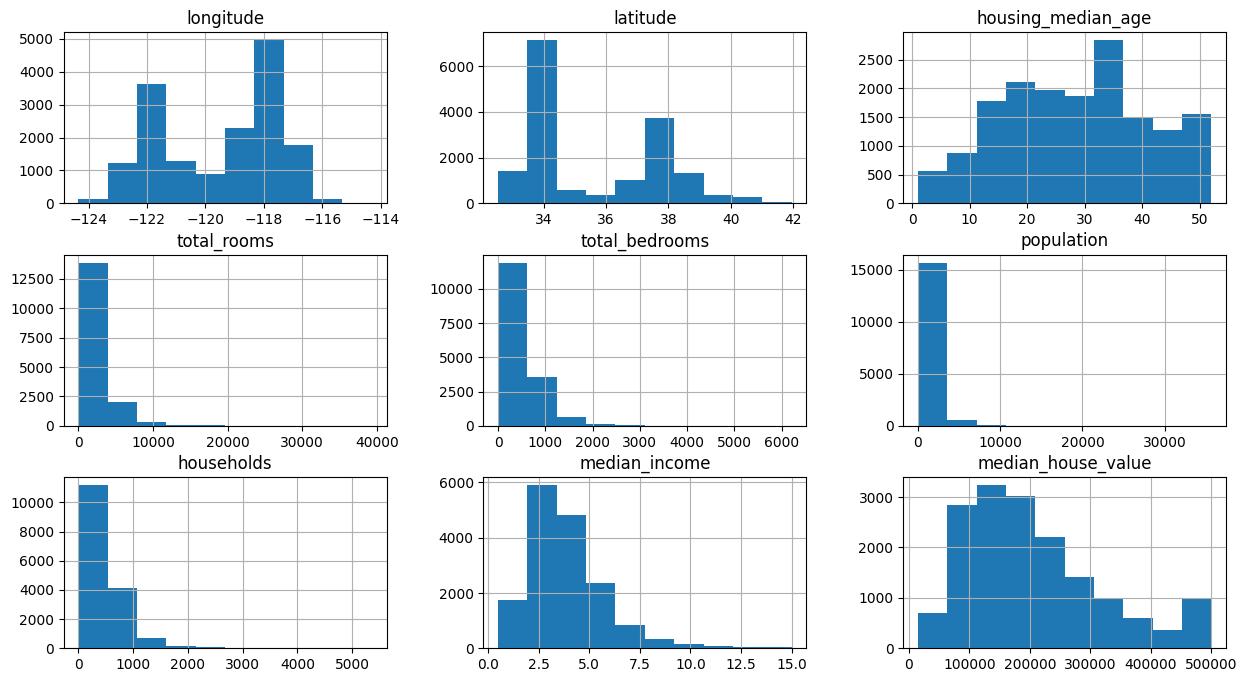

In [85]:
train_data.hist(figsize=(15,8))

<Axes: >

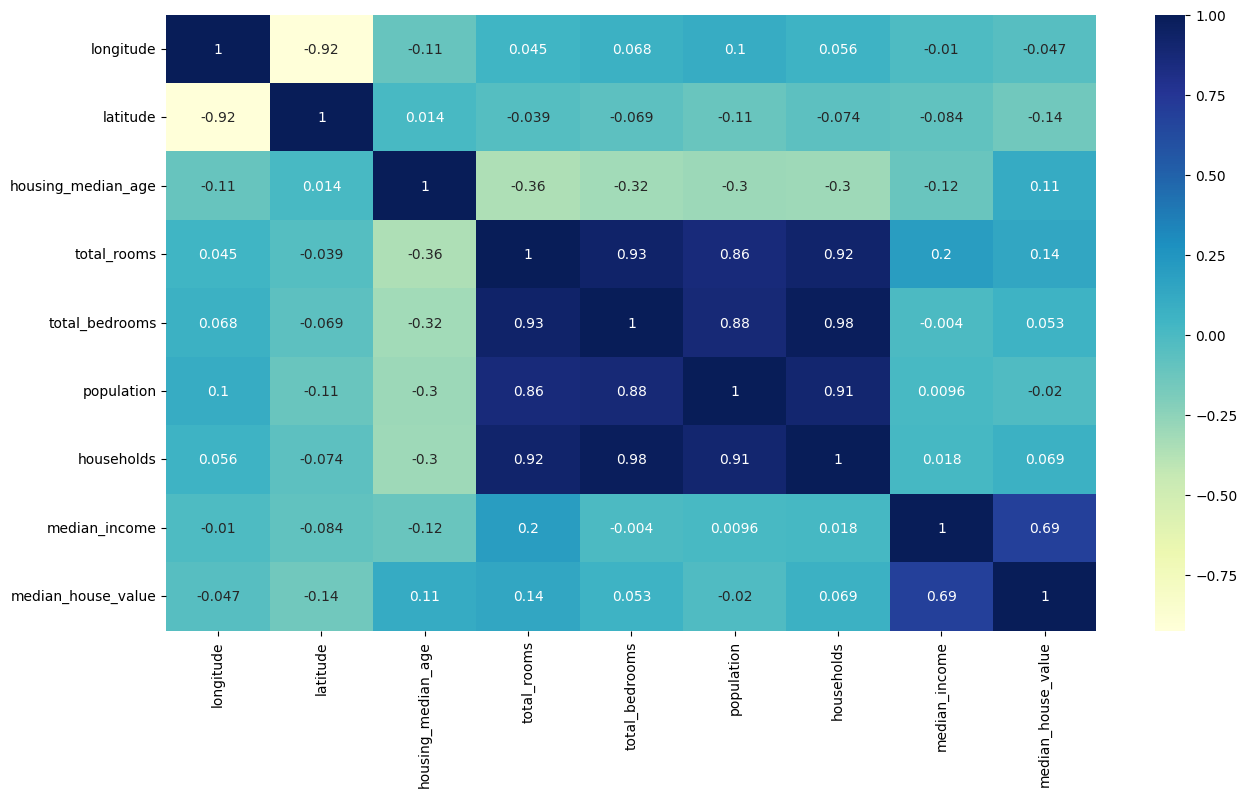

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [87]:
# as we've seen on train data histograms most of them are right skewed we can use logarithmiscs

In [88]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

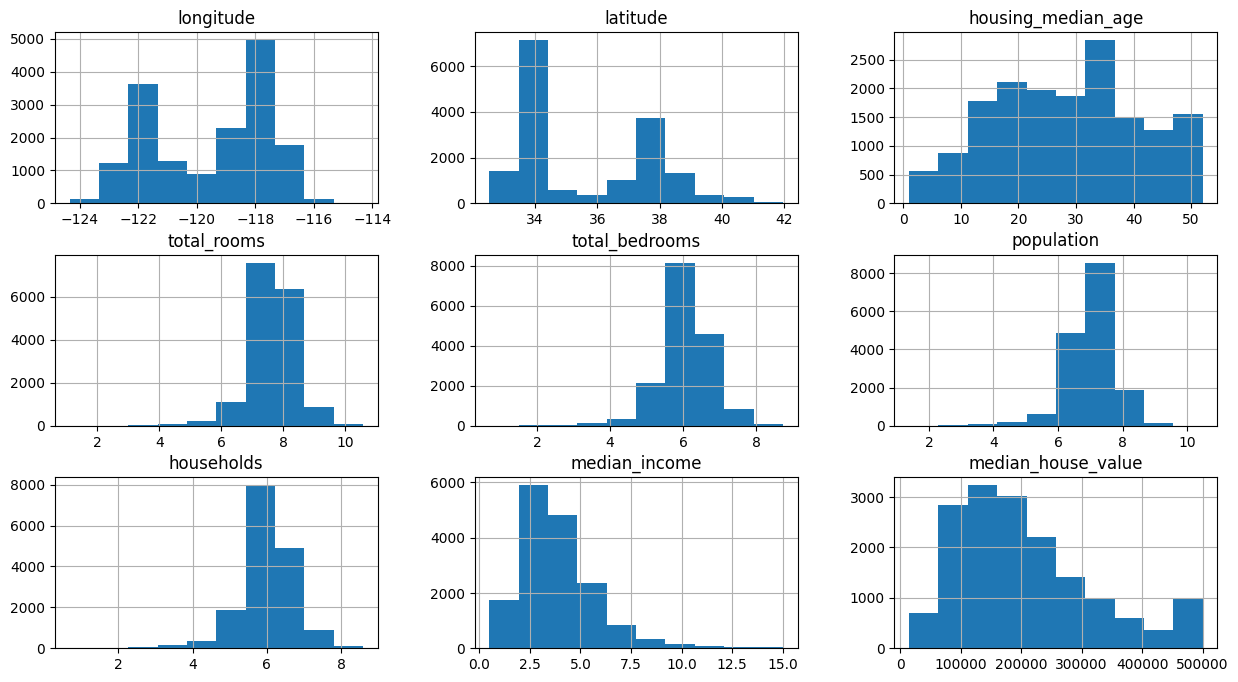

In [89]:
train_data.hist(figsize=(15,8))

In [90]:
#ocean_proximity for us have high priority when choosing house , so as much hous eis near to ocean maybe price willbe meuch more than in inland,
#so we should use it as mandatory thing in our model

In [91]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7239
INLAND        5167
NEAR OCEAN    2123
NEAR BAY      1813
ISLAND           4
Name: count, dtype: int64

In [92]:
train_data=pd.get_dummies(train_data,columns=['ocean_proximity'])

In [93]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14314,-117.14,32.70,43.0,7.027315,5.669881,7.032624,5.686975,2.1875,87000.0,False,False,False,False,True
2331,-119.72,36.82,15.0,6.853299,5.480639,6.311735,5.509388,2.2639,52500.0,False,True,False,False,False
12172,-117.16,33.73,10.0,7.775696,6.120297,7.188413,6.169611,2.6322,140700.0,False,True,False,False,False
3620,-118.45,34.25,21.0,7.670429,6.338594,7.497762,6.210600,3.9833,162500.0,True,False,False,False,False
7614,-118.23,33.88,41.0,7.571474,5.908083,7.094235,5.780744,3.0417,113700.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,-121.91,39.03,48.0,7.000334,5.389072,6.489205,5.298317,2.7841,65800.0,False,True,False,False,False
15350,-117.30,33.26,23.0,7.425954,5.620401,7.113142,5.579730,4.1713,133800.0,True,False,False,False,False
6546,-118.03,34.05,36.0,7.204893,5.805135,7.321189,5.736572,3.5129,142300.0,True,False,False,False,False
18892,-122.24,38.11,52.0,7.655391,5.739793,6.650279,5.780744,4.7750,148200.0,False,False,False,True,False


<Axes: >

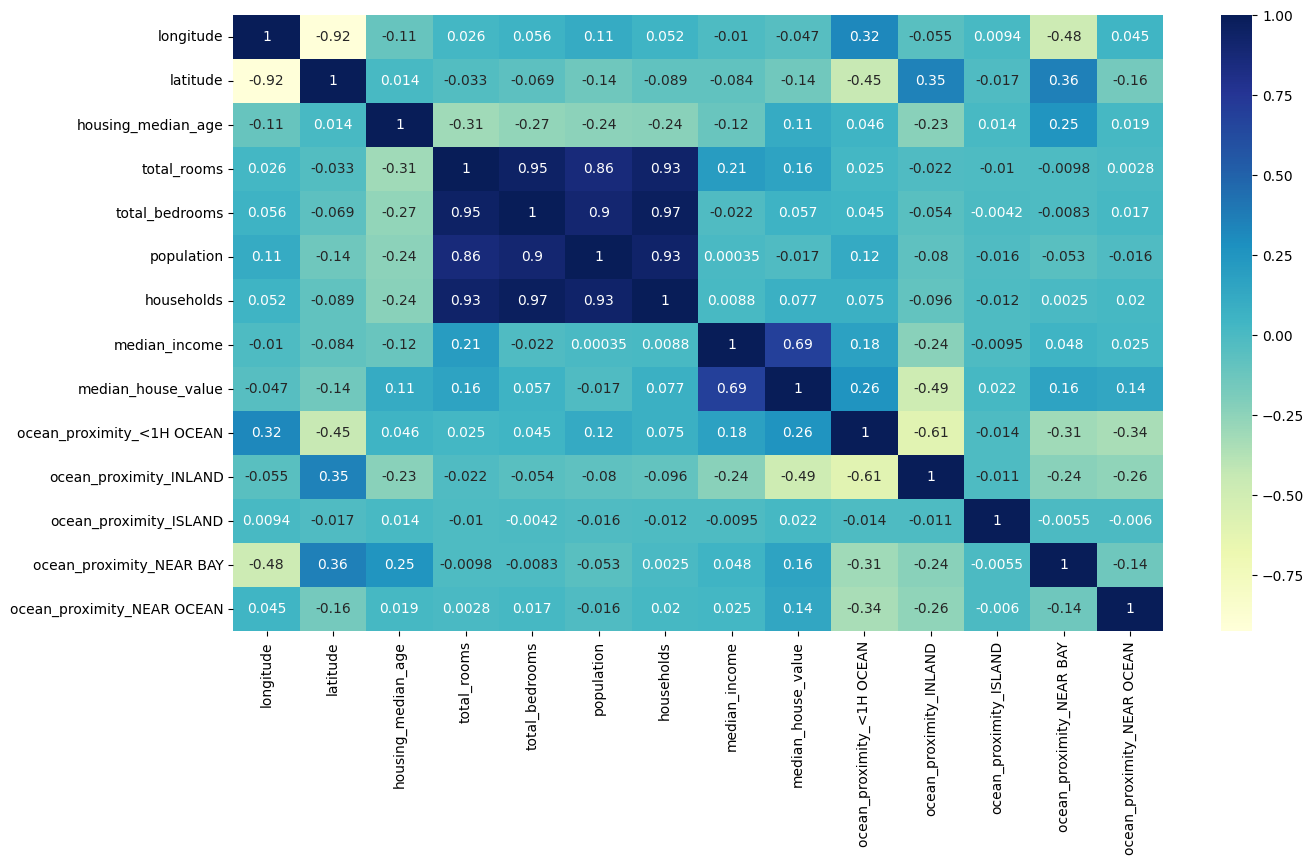

In [94]:
# let's see now how new category correlate
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

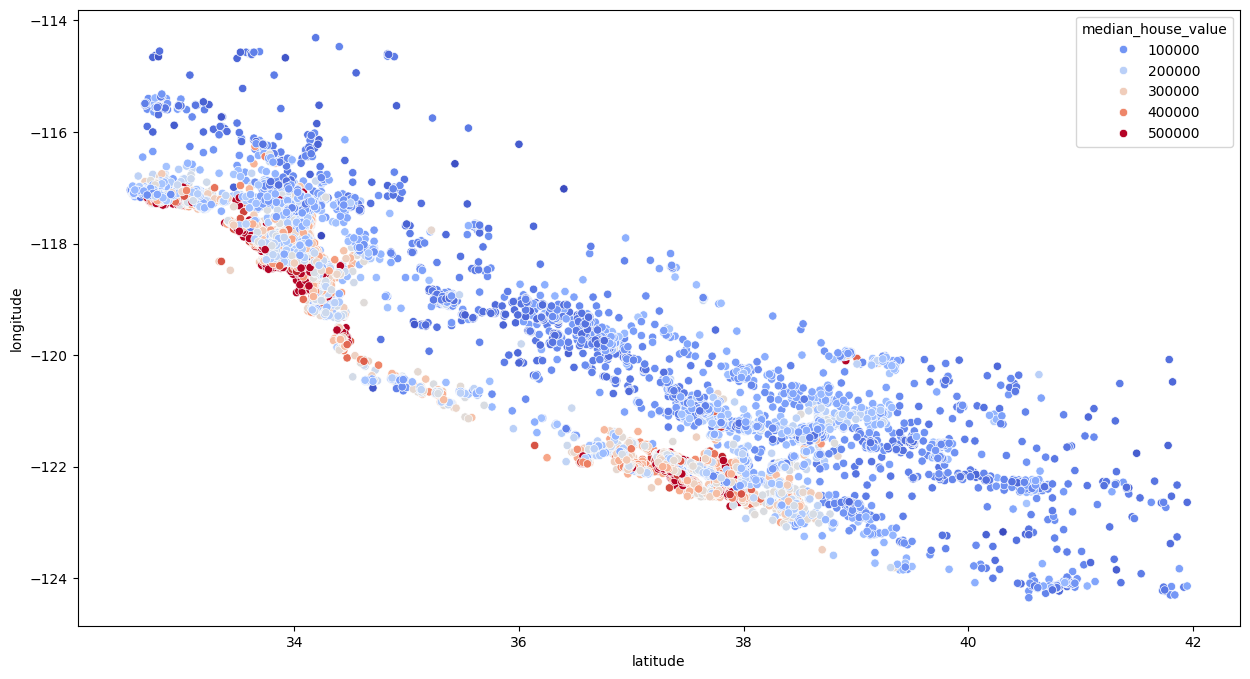

In [95]:
#this scatterplot also proves that houses near to ocean are much more expensive than to inland
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data, hue='median_house_value',palette='coolwarm')

In [96]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

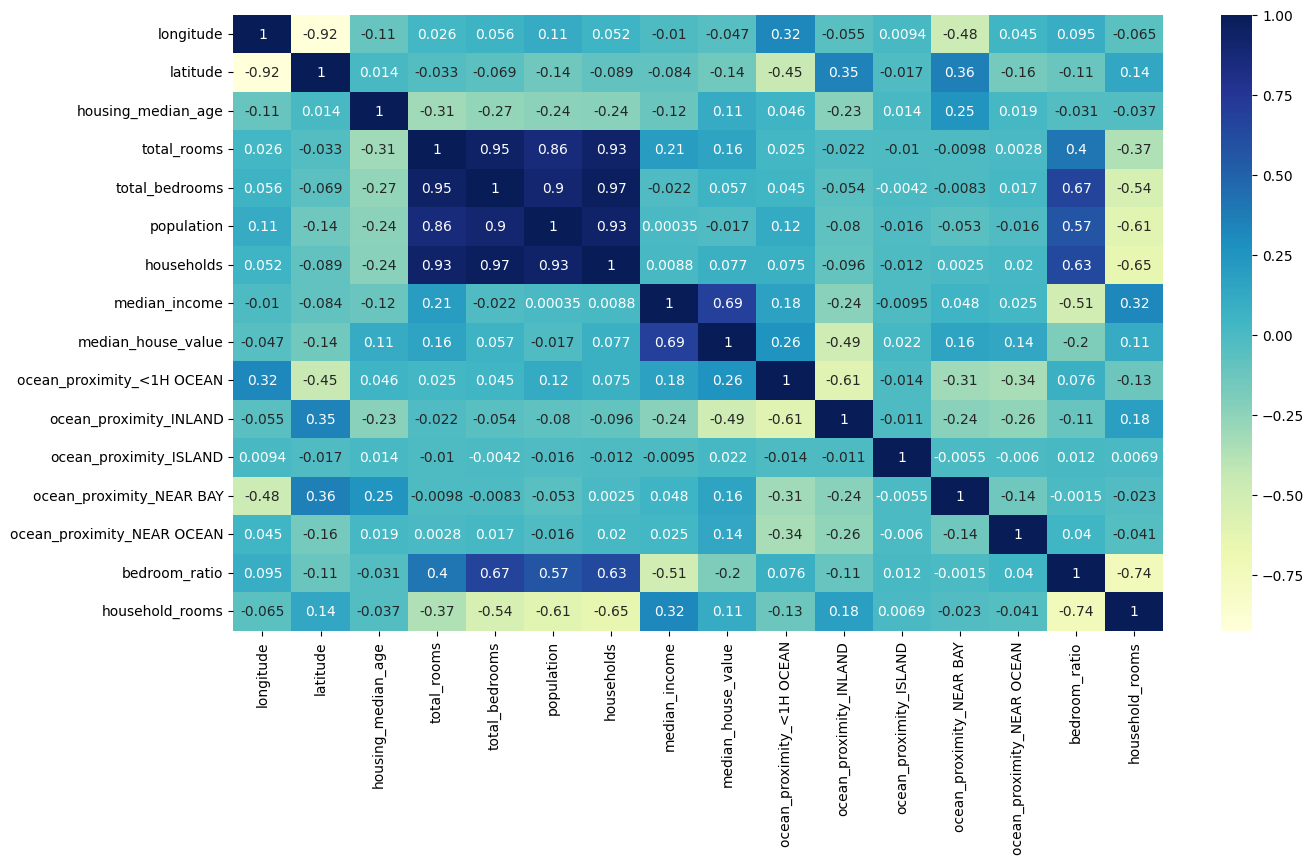

In [97]:
# let's see now how new category correlate
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [106]:
from sklearn.linear_model import LinearRegression


X_train, Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg= LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [101]:
test_data= x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=pd.get_dummies(test_data,columns=['ocean_proximity'])


test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

x_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [107]:
x_test_s= scaler.transform(x_test)

In [109]:
reg.score(x_test,y_test)

0.6663098895256292

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,Y_train)
forest.score(x_test,y_test)

0.806658240605028